# KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from sklearn.decomposition import PCA
matplotlib.style.use('ggplot') # Look Pretty

In [5]:
X = pd.read_csv('wheat.data')
y = X.wheat_type
X.drop(labels = ['id', 'wheat_type'], axis = 1, inplace = True)
#Encode your 3 possible wheat types into a label that you can plot distinctly
#"nominal" conversion of 'y' by encoding it to a SINGLE variable (e.g. 0, 1, 2)
y = y.astype('category').cat.codes

In [7]:
# Check for missing values!

print X.isnull().sum() 
print y.isnull().sum() 

#Basic nan munging. Fill each row's nans with the mean of the feature

X.compactness.fillna(X.compactness.mean(), inplace = True)
X.width.fillna(X.width.mean(), inplace = True)
X.groove.fillna(X.groove.mean(), inplace = True)


print X.isnull().sum() # No more missing values

area           0
perimeter      0
compactness    3
length         0
width          1
asymmetry      0
groove         4
dtype: int64
0
area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
dtype: int64


In [8]:
#"normalize" preprocessor to normalize X's feature data
T = preprocessing.normalize(X)

In [11]:
# Project both your X_train and X_test features into PCA space
pca = PCA(n_components = 2)
pca_X = pca.fit_transform(T)

In [13]:
# Split out your training and testing data
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.33, random_state = 1)

In [14]:
# Run KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [15]:
# Method for plotting desicion boundaries

def plotDecisionBoundary(model, X, y):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.6
  resolution = 0.0025
  colors = ['royalblue','forestgreen','ghostwhite']

  # Calculate the boundaries
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix are the predictions of the class at said location
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)
  plt.axis('tight')

  # Plot our original points as well...
  for label in range(len(np.unique(y))):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

  p = model.get_params()
  plt.title('K = ' + str(p['n_neighbors']))

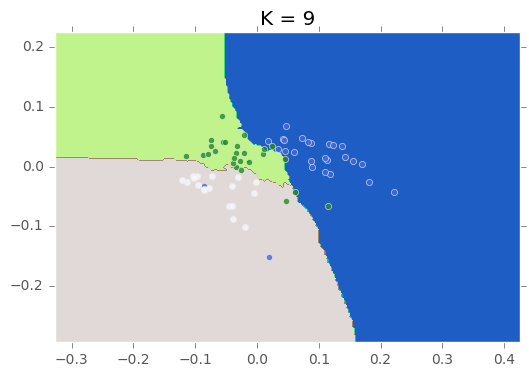

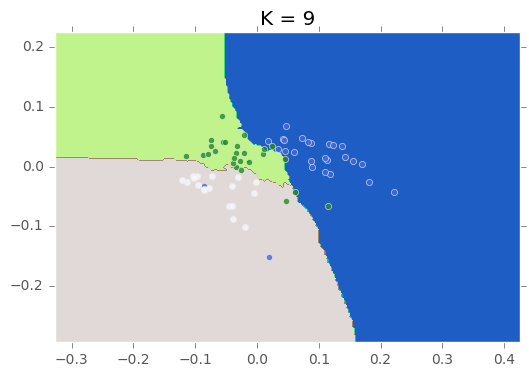

In [19]:
plotDecisionBoundary(knn, X_test, y_test)
plt.show()

In [20]:
# Accuracy score of your KNeighbors Classifier when K=9 
print knn.score(X_test, y_test)

0.857142857143
